In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

plt.rc('text', usetex = False)
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font',   size      = SMALL_SIZE)   # controls default text sizes
plt.rc('axes',   titlesize = SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize = MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (7, 5)

In [3]:
def twos_complement(hexstr,bits):    
    value = int(hexstr,16)    
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

In [4]:
def get_data(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    imPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
        strIm = rawArray.iloc[i,3].split('h')[1]
        imPt[i] = twos_complement(strIm,nBits)
    return [t_us, realPt, imPt]

In [25]:
def fft(data, fs):
    vec = data[1] + 1j*data[2]
    fft = np.fft.fftshift(np.fft.fft(vec))
    freq = np.linspace(-fs/2, fs/2, len(fft))
    return [freq, fft]


## Input Data

In [6]:
dataIn = pd.read_table('unTonoSinRuido/dataIn.lst', sep=' ', skipinitialspace=True, skiprows=3, keep_default_na = False, header=None)

In [7]:
def get_data_real(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
    return [t_us, realPt]

In [8]:
dataInData = get_data_real(dataIn, 16, 5000)

(30000000000000.0, 30500000000000.0)

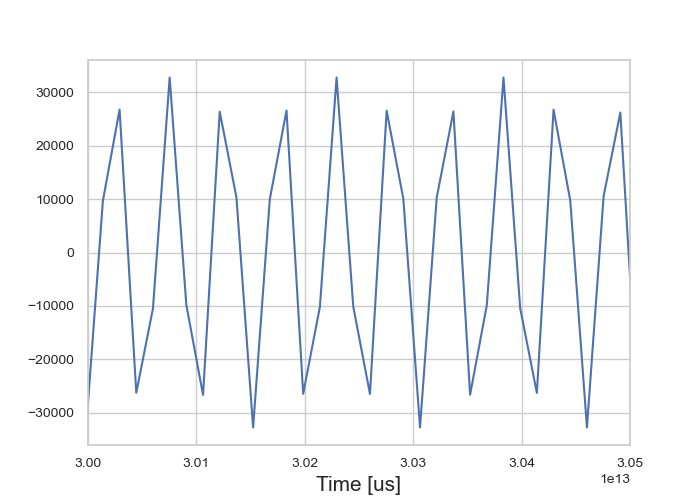

In [17]:
plt.figure()
plt.plot(dataInData[0]*1e6, dataInData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.05e13])

Text(0.5, 0, 'Frequency [MHz]')

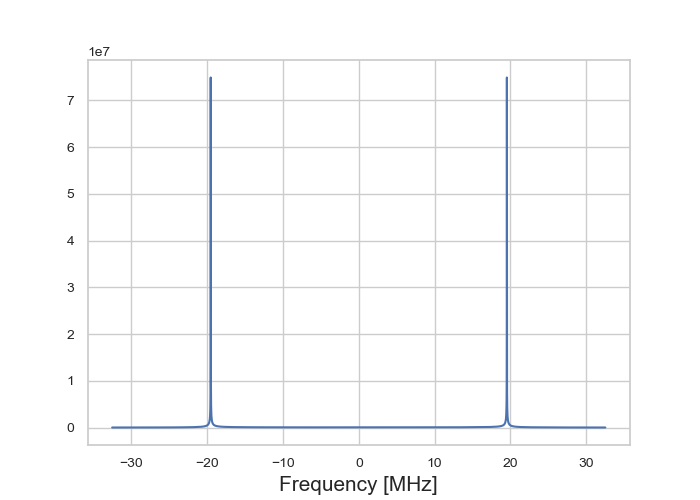

In [18]:
fft = np.fft.fftshift(np.fft.fft(dataInData[1]))
fs = 65e6
freq = np.linspace(-fs/2, fs/2, len(fft))
plt.figure()
plt.plot(freq*1e-6, np.abs(fft))
plt.xlabel('Frequency [MHz]')


## Band Mixer

In [19]:
bandMixer = pd.read_table('unTonoSinRuido/bandMixer.lst', sep=' ', skipinitialspace=True, skiprows=4, keep_default_na = False, header=None)

In [20]:
bandMixerData = get_data(bandMixer, 16, 5000)

(30000000000000.0, 33000000000000.0)

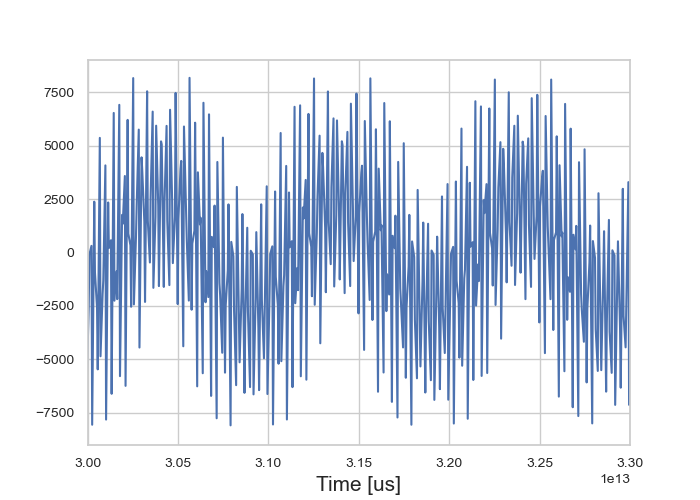

In [23]:
plt.figure()
plt.plot(bandMixerData[0]*1e6, bandMixerData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.3e13])


In [26]:
fs = 65e6
freq, fftData = fft(bandMixerData, fs)

Text(0.5, 0, 'Frequency [MHz]')

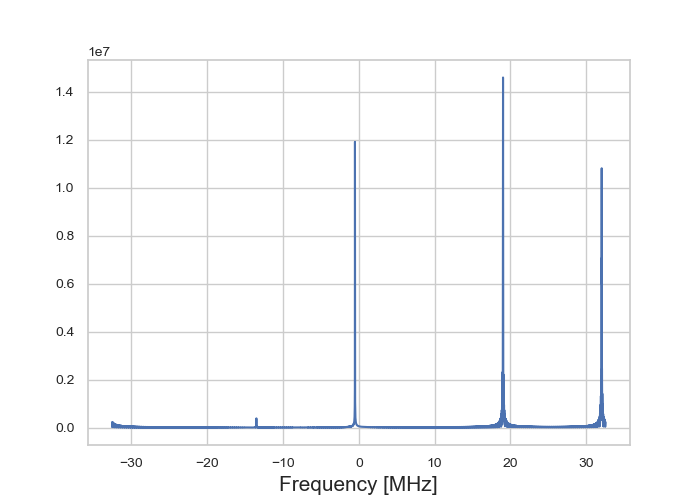

In [27]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')


## Band Filter

In [28]:
bandFilter = pd.read_table('unTonoSinRuido/bandFilter.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [29]:
bandFilterData = get_data(bandFilter, 16, 5000)

(30000000000000.0, 33000000000000.0)

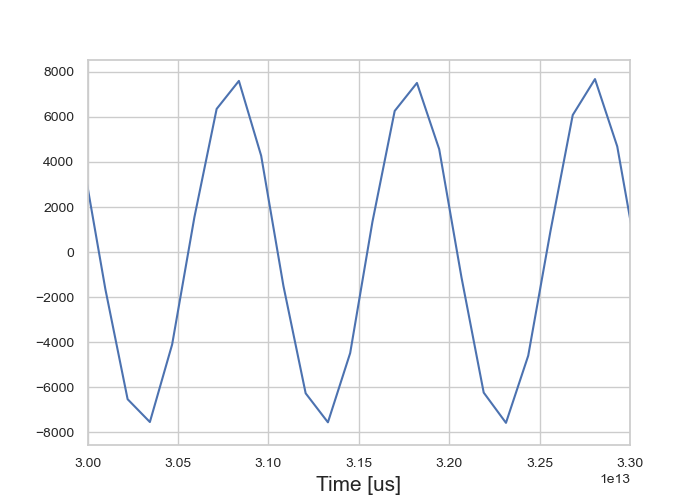

In [30]:
plt.figure()
plt.plot(bandFilterData[0]*1e6, bandFilterData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.3e13])

In [31]:
fs = 8.125e6
freq, fftData = fft(bandFilterData, fs)

Text(0.5, 0, 'Frequency [MHz]')

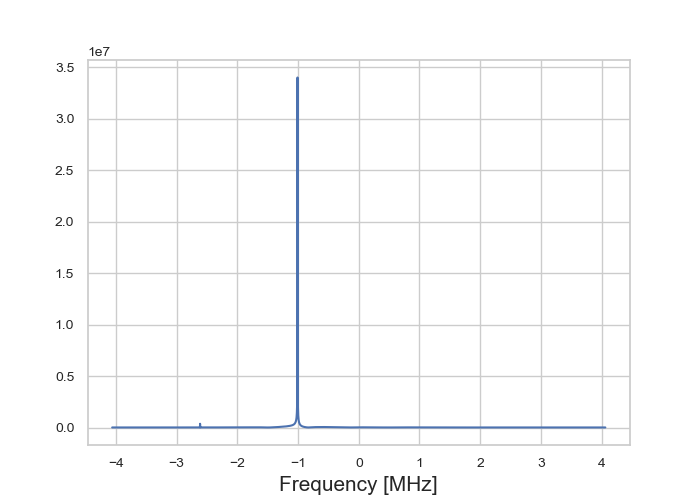

In [32]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')

## Channel Mixer

In [4]:
chMixer = pd.read_table('unTonoSinRuido/chMixer.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [13]:
chMixerData = get_data(chMixer,16,5000)

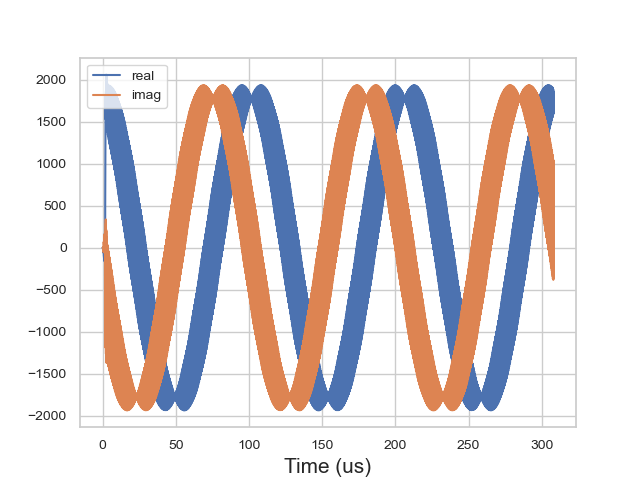

In [14]:
plt.figure()
plt.plot(chMixerData[0]*1e-6, chMixerData[1], label='real')
plt.plot(chMixerData[0]*1e-6, chMixerData[2], label='imag')
plt.legend()
plt.xlabel('Time (us)')
plt.show()

In [25]:
fft_re = np.fft.fftshift(np.fft.fft(chMixerData[1]))
fft_im = np.fft.fftshift(np.fft.fft(chMixerData[2]))
fs = 8.125*1e6
freq = np.linspace(-fs/2,fs/2,len(fft_re))

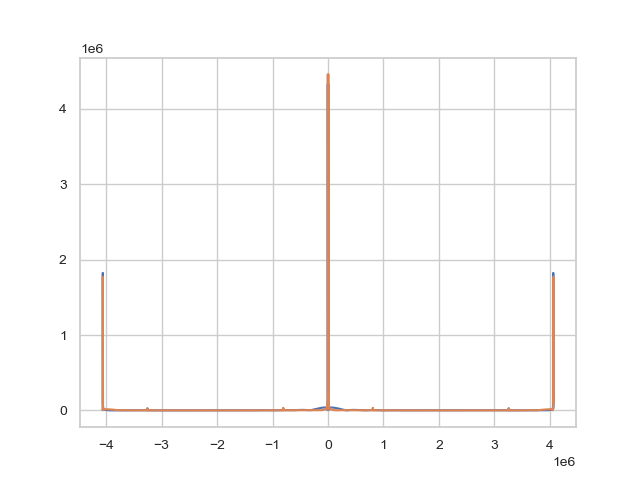

In [26]:
plt.figure()
plt.plot(freq, np.abs(fft_re), label='real')
plt.plot(freq, np.abs(fft_im), label='imag')

In [32]:
fft_data = fft(chMixerData, 8.125e6)

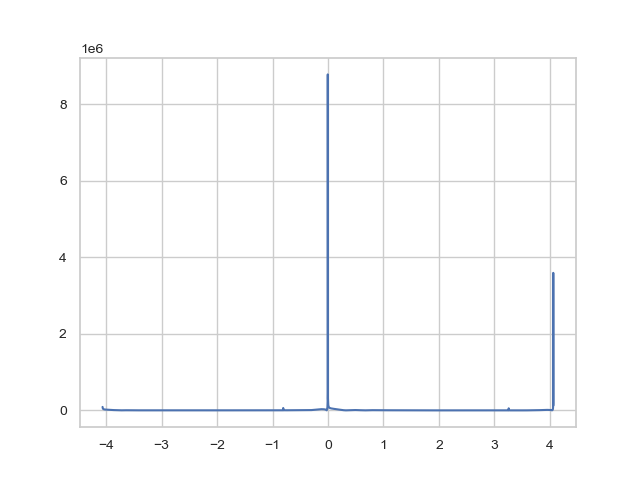

In [34]:
plt.figure()
plt.plot(fft_data[0]*1e-6, np.abs(fft_data[1]))
#plt.xlim([-15,15])

## Channel Filter

In [33]:
chFilter = pd.read_table('unTonoSinRuido/chFilter.lst', sep=' ', skipinitialspace=True, skiprows=0, keep_default_na = False, header=None)

In [36]:
chFilterData = get_data(chFilter, 40)

<ipython-input-40-dc9f65c800c8>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Text(0.5, 0, 'Time [us]')

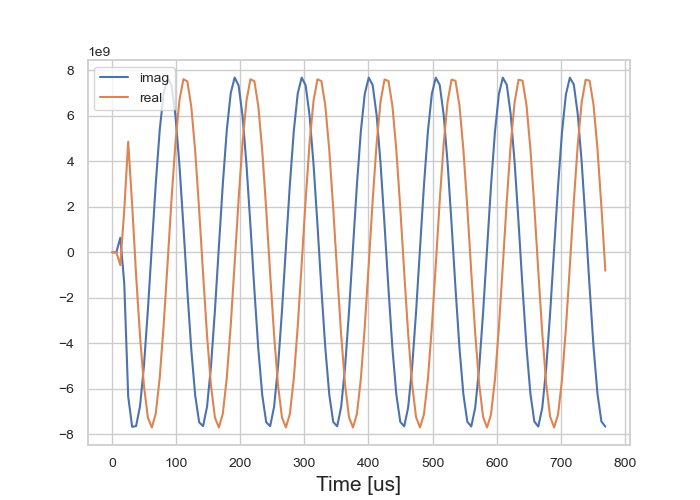

In [40]:
plt.figure()
plt.plot(chFilterData[0]*1e-6, chFilterData[1], label='imag')
plt.plot(chFilterData[0]*1e-6, chFilterData[2], label='real')
plt.legend()
plt.xlabel('Time [us]')

In [43]:
fs = 162.5e3
freq, fftData = fft(chFilterData, fs)

(-15.0, 15.0)

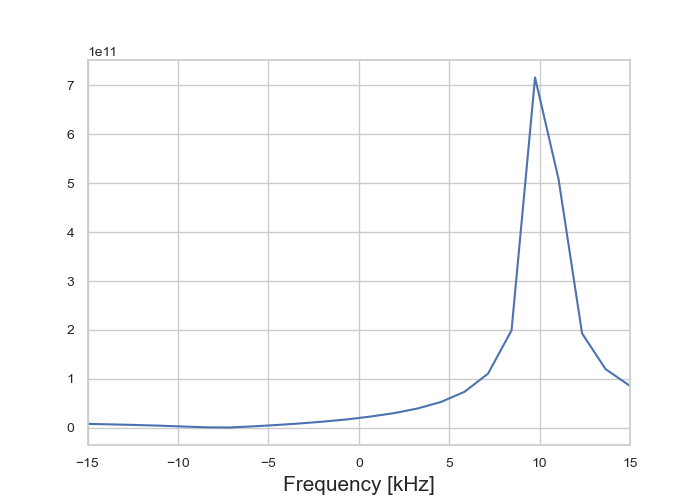

In [44]:
plt.figure()
plt.plot(freq*1e-3, np.abs(fftData))
plt.xlabel('Frequency [kHz]')
plt.xlim([-15,15])